In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers,initializers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad,Adadelta,Adam,Adamax,Nadam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2023-04-23 21:47:30.804441: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from main_encoder import MainEncoder
from final_encoder import FinalEncoder
from small_decoder import SmallDecoder 
from big_decoder import BigDecoder

In [3]:
gene = pd.read_csv("final_gene.txt", sep="\t")
methyl = pd.read_csv('final_methyl.txt', sep="\t")
prot = pd.read_csv('final_prot.txt', sep="\t")

In [4]:
gene = gene.set_index('participant_id')
methyl = methyl.set_index('participant_id')
prot = prot.set_index('participant_id')

In [5]:
gene_sample = gene['sample_type']
methyl_sample = methyl['sample_type']
prot_sample = prot['sample_type']

In [6]:
gene_index = gene.index
methyl_index = methyl.index
prot_index = prot.index

In [7]:
gene_columns = gene.columns
methyl_columns = methyl.columns
prot_columns = prot.columns

In [8]:
gene.drop(columns = ['sample_type'], inplace = True)
methyl.drop(columns = ['sample_type'], inplace = True)
prot.drop(columns = ['sample_type'], inplace = True)

In [16]:
x =  prot

if x.equals(gene):
    input_dim = 915
    latent_dim = 20
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_gene = encoder.predict(x)
    
elif x.equals(methyl):
    input_dim = 1006
    latent_dim = 20
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_methyl = encoder.predict(x)
elif x.equals(prot): 
    input_dim = 226
    latent_dim = 20   
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_prot = encoder.predict(x)

20/20 [==============================] - 0s 1ms/step


In [17]:
concatenated_latent_space = np.concatenate((encoded_gene, encoded_prot, encoded_methyl), axis=1)

In [19]:
final_encoder = FinalEncoder(input_dim=60, latent_dim=15)
integrated_space = final_encoder.predict(concatenated_latent_space)

20/20 [==============================] - 0s 1ms/step


In [20]:
decoder_small = SmallDecoder(input_dim=15, decode_dim=60)
adam = keras.optimizers.Adam(learning_rate=0.001)
decoder_small.compile(optimizer= adam , loss='mse')

In [21]:
decoder_small.fit(integrated_space, concatenated_latent_space , epochs=1000)

Epoch 1/1000
20/20 [==============================] - 1s 2ms/step - loss: 3.3842
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 3.0541
Epoch 3/1000
20/20 [==============================] - 0s 1ms/step - loss: 2.7752
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 2.4359
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 2.0504
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 1.6235
Epoch 7/1000
20/20 [==============================] - 0s 1ms/step - loss: 1.2018
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.8277
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5322
Epoch 10/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 11/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2181
Epoch 12/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1601
Epoch 13/1000
20/20 [====

20/20 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 102/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0507
Epoch 103/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 104/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0546
Epoch 105/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0548
Epoch 106/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0529
Epoch 107/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0529
Epoch 108/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0518
Epoch 109/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0502
Epoch 110/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0549
Epoch 111/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0501
Epoch 112/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0499
Epoch 113/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0445
Epoch 200/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 201/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0447
Epoch 202/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 203/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 204/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0511
Epoch 205/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 206/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 207/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 208/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 209/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 210/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0523
Epoch 211/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0430
Epoch 298/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 299/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362
Epoch 300/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 301/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 302/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 303/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0365
Epoch 304/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 305/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0378
Epoch 306/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0395
Epoch 307/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 308/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 309/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 396/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 397/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 398/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 399/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 400/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 401/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 402/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 403/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 404/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 405/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0332
Epoch 406/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 407/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 494/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 495/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0369
Epoch 496/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 497/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 498/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 499/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 500/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0323
Epoch 501/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 502/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 503/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 504/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0378
Epoch 505/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 592/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 593/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 594/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 595/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 596/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 597/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 598/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 599/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 600/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 601/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 602/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 603/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 690/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0314
Epoch 691/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 692/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 693/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 694/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 695/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 696/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 697/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 698/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 699/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 700/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 701/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0299
Epoch 788/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 789/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 790/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0284
Epoch 791/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0285
Epoch 792/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 793/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 794/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 795/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 796/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 797/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 798/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 799/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0339
Epoch 886/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 887/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0285
Epoch 888/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 889/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 890/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 891/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0293
Epoch 892/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 893/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 894/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 895/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 896/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 897/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 984/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 985/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 986/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 987/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 988/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0294
Epoch 989/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 990/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 991/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 992/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 993/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 994/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 995/1000
20/2

In [22]:
conc_reconstructed_data = decoder_small.predict(integrated_space)

20/20 [==============================] - 0s 880us/step


In [49]:
decoder_big = BigDecoder(input_dim=60, decode_dim=1006)
adam = keras.optimizers.Adam(learning_rate=0.001)
decoder_big.compile(optimizer= adam , loss='mse')

In [50]:
decoder_big.fit(conc_reconstructed_data, methyl, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 1s 3ms/step - loss: 0.0732
Epoch 2/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 5/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 8/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 9/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 10/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 11/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 12/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 13/1000
20/20 [====

20/20 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 102/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 103/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 104/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 105/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 106/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 107/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 108/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 109/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 110/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 111/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 112/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 113/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 200/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 201/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 202/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 203/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 204/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 205/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 206/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 207/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 208/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 209/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 210/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 211/1000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 298/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 299/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 300/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 301/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 302/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 303/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 304/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 305/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 306/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 307/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 308/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 309/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 396/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 397/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 398/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 399/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 400/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 401/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 402/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 403/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 404/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 405/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 406/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 407/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 494/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 495/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 496/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 497/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 498/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 499/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 500/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 501/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 502/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 503/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 504/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 505/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 592/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 593/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 594/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 595/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 596/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 597/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 598/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 599/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 600/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 601/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 602/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 603/1000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 690/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 691/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 692/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 693/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 694/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 695/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 696/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 697/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 698/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 699/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 700/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 701/1000
20/2

20/20 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 788/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 789/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 790/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 791/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 792/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 793/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 794/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 795/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 796/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 797/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 798/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 799/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 886/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 887/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 888/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 889/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 890/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 891/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 892/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 893/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 894/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 895/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 896/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 897/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 984/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 985/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 986/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 987/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 988/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 989/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 990/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 991/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 992/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 993/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 994/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 995/1000
20/2

In [51]:
reconstructed_data = decoder_big.predict(conc_reconstructed_data)

20/20 [==============================] - 0s 1ms/step


In [26]:
reconstructed_data = pd.DataFrame(reconstructed_data)
reconstructed_data['sample_type'] = prot_sample.values

In [27]:
integrated_space = pd.DataFrame(integrated_space)
integrated_space['sample_type'] = prot_sample.values

In [28]:
prot['sample_type'] = prot_sample.values

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X = prot.drop(columns=['sample_type'])
y = prot['sample_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='rbf', random_state=42)

model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_orig)

Accuracy: 0.9921875


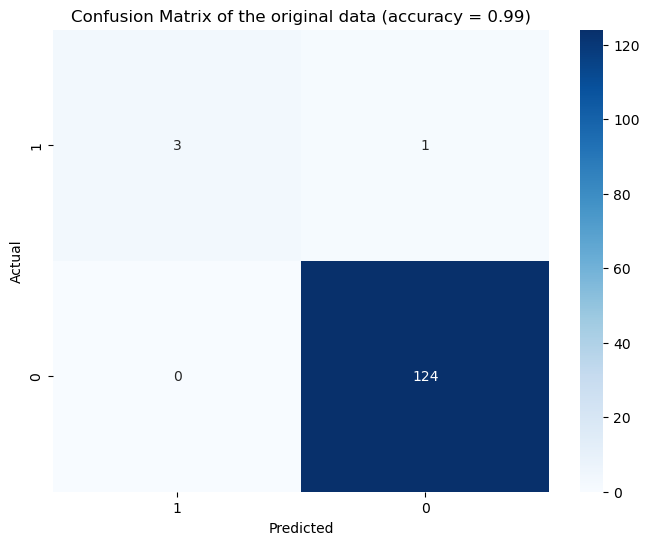

In [30]:
class_names = [1,0]
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
#plt.title(f'Confusion Matrix of the original data (accuracy = 0.90)')
plt.title(f'Confusion Matrix of the original data (accuracy = {accuracy_orig:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X_rec = reconstructed_data.drop(columns=['sample_type'])
y_rec = reconstructed_data['sample_type']

# Split the data into training and testing sets
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X_rec, y_rec, test_size=0.2, random_state=42)

# Train the SVM model
model_rec = SVC(kernel='rbf', random_state=42)

model_rec.fit(X_train_rec, y_train_rec)

# Evaluate the model on the testing data
y_pred_rec = model_rec.predict(X_test_rec)
accuracy_rec = accuracy_score(y_test_rec, y_pred_rec)
print('Accuracy:', accuracy_rec)


Accuracy: 0.96875


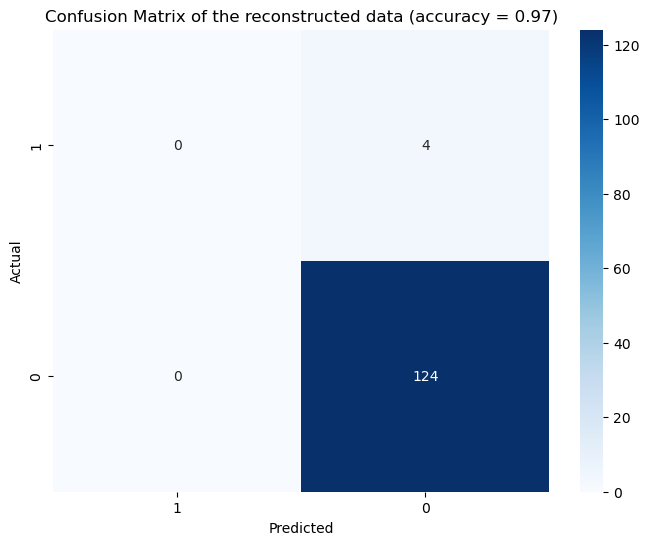

In [32]:
class_names = [1,0]
conf_matrix = confusion_matrix(y_test_rec,y_pred_rec, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix of the reconstructed data (accuracy = {accuracy_rec:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X_conc = integrated_space.drop(columns=['sample_type'])
y_conc = integrated_space['sample_type']

# Split the data into training and testing sets
X_train_conc, X_test_conc, y_train_conc, y_test_conc = train_test_split(X_conc, y_conc, test_size=0.2, random_state=42)

# Train the SVM model
model_conc = SVC(kernel='rbf', random_state=42)

model_conc.fit(X_train_conc, y_train_conc)

# Evaluate the model on the testing data
y_pred_conc = model_conc.predict(X_test_conc)
accuracy_inte = accuracy_score(y_test_conc, y_pred_conc)
print('Accuracy:', accuracy_inte)


Accuracy: 0.96875


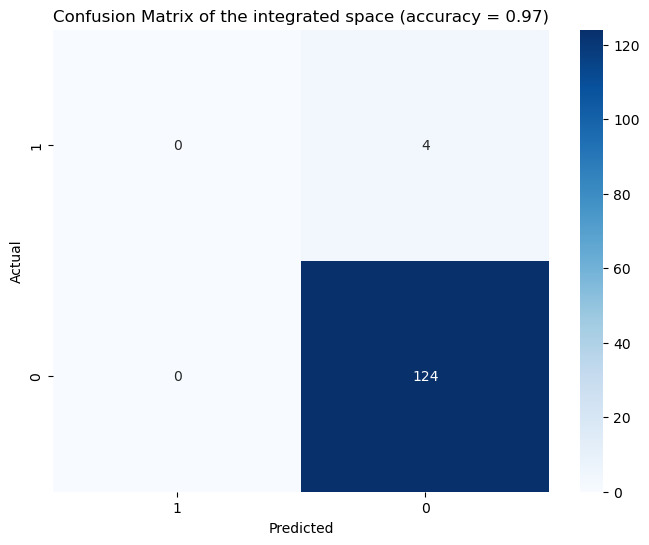

In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix

class_names = [1,0]
conf_matrix = confusion_matrix(y_test_conc,y_pred_conc, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix of the integrated space (accuracy = {accuracy_inte:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
reconstructed_data = pd.DataFrame(reconstructed_data)
reconstructed_data['sample_type'] = gene_sample.values

In [39]:
integrated_space = pd.DataFrame(integrated_space)
integrated_space['sample_type'] = gene_sample.values

In [40]:
gene['sample_type'] = gene_sample.values

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X = gene.drop(columns=['sample_type'])
y = gene['sample_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='rbf', random_state=42)

model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_orig)

Accuracy: 0.9921875


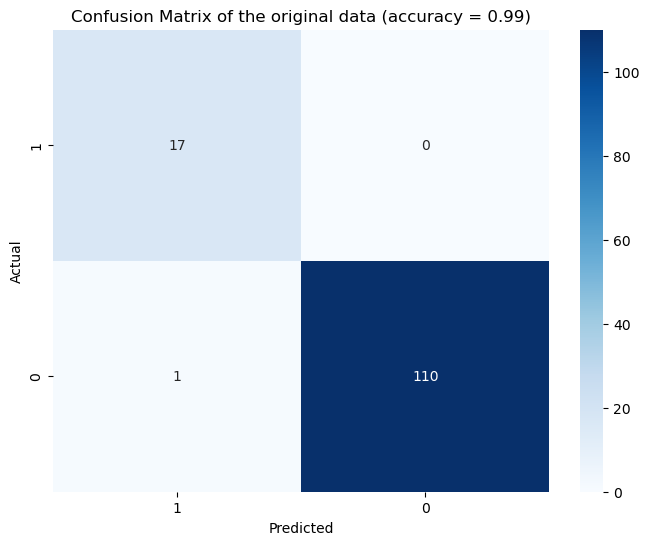

In [42]:
class_names = [1,0]
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
#plt.title(f'Confusion Matrix of the original data (accuracy = 0.90)')
plt.title(f'Confusion Matrix of the original data (accuracy = {accuracy_orig:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X_rec = reconstructed_data.drop(columns=['sample_type'])
y_rec = reconstructed_data['sample_type']

# Split the data into training and testing sets
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X_rec, y_rec, test_size=0.2, random_state=42)

# Train the SVM model
model_rec = SVC(kernel='rbf', random_state=42)

model_rec.fit(X_train_rec, y_train_rec)

# Evaluate the model on the testing data
y_pred_rec = model_rec.predict(X_test_rec)
accuracy_rec = accuracy_score(y_test_rec, y_pred_rec)
print('Accuracy:', accuracy_rec)


Accuracy: 0.9765625


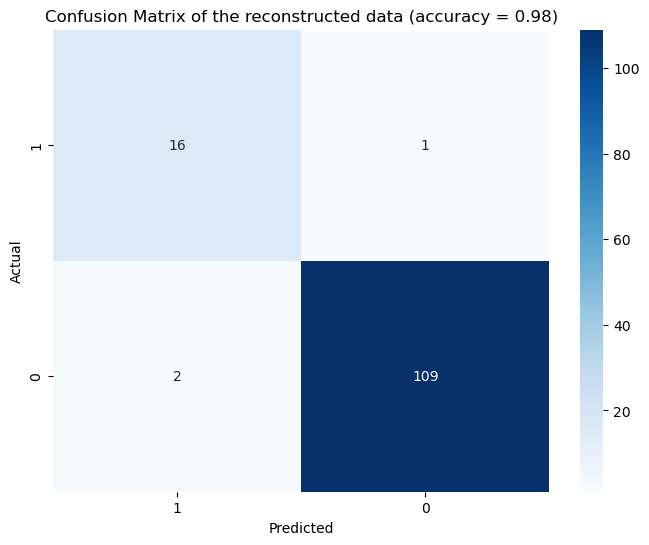

In [44]:
class_names = [1,0]
conf_matrix = confusion_matrix(y_test_rec,y_pred_rec, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix of the reconstructed data (accuracy = {accuracy_rec:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X_conc = integrated_space.drop(columns=['sample_type'])
y_conc = integrated_space['sample_type']

# Split the data into training and testing sets
X_train_conc, X_test_conc, y_train_conc, y_test_conc = train_test_split(X_conc, y_conc, test_size=0.2, random_state=42)

# Train the SVM model
model_conc = SVC(kernel='rbf', random_state=42)

model_conc.fit(X_train_conc, y_train_conc)

# Evaluate the model on the testing data
y_pred_conc = model_conc.predict(X_test_conc)
accuracy_inte = accuracy_score(y_test_conc, y_pred_conc)
print('Accuracy:', accuracy_inte)

Accuracy: 0.921875


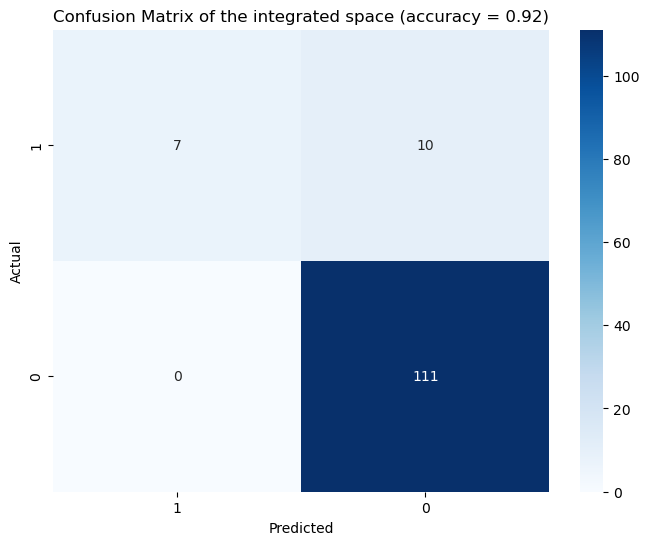

In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix

class_names = [1,0]
conf_matrix = confusion_matrix(y_test_conc,y_pred_conc, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix of the integrated space (accuracy = {accuracy_inte:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
reconstructed_data = pd.DataFrame(reconstructed_data)
reconstructed_data['sample_type'] = methyl_sample.values

In [57]:
integrated_space = pd.DataFrame(integrated_space)
integrated_space['sample_type'] = methyl_sample.values

In [52]:
methyl['sample_type'] = methyl_sample.values

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X = methyl.drop(columns=['sample_type'])
y = methyl['sample_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='rbf', random_state=42)

model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_orig)

Accuracy: 0.9921875


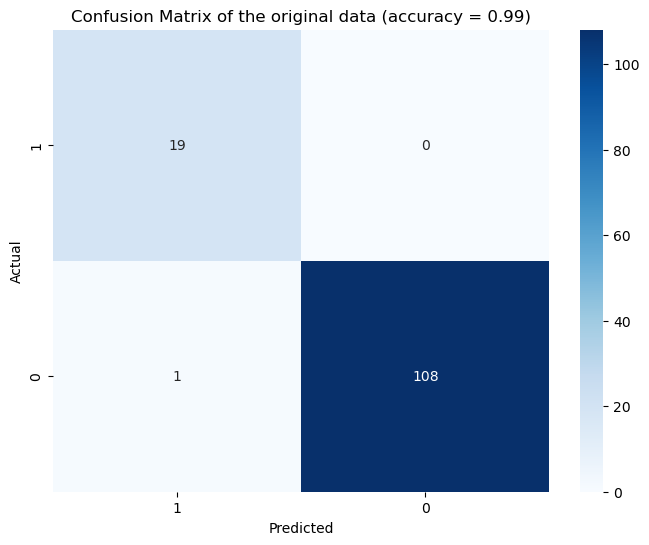

In [58]:
class_names = [1,0]
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
#plt.title(f'Confusion Matrix of the original data (accuracy = 0.90)')
plt.title(f'Confusion Matrix of the original data (accuracy = {accuracy_orig:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X_rec = reconstructed_data.drop(columns=['sample_type'])
y_rec = reconstructed_data['sample_type']

# Split the data into training and testing sets
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X_rec, y_rec, test_size=0.2, random_state=42)

# Train the SVM model
model_rec = SVC(kernel='rbf', random_state=42)

model_rec.fit(X_train_rec, y_train_rec)

# Evaluate the model on the testing data
y_pred_rec = model_rec.predict(X_test_rec)
accuracy_rec = accuracy_score(y_test_rec, y_pred_rec)
print('Accuracy:', accuracy_rec)


Accuracy: 0.9921875


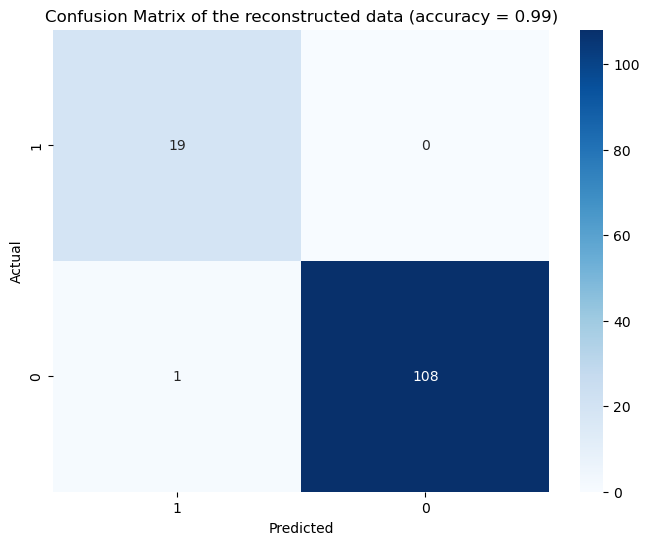

In [60]:
class_names = [1,0]
conf_matrix = confusion_matrix(y_test_rec,y_pred_rec, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix of the reconstructed data (accuracy = {accuracy_rec:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd


# Split the data into features and target variable
X_conc = integrated_space.drop(columns=['sample_type'])
y_conc = integrated_space['sample_type']

# Split the data into training and testing sets
X_train_conc, X_test_conc, y_train_conc, y_test_conc = train_test_split(X_conc, y_conc, test_size=0.2, random_state=42)

# Train the SVM model
model_conc = SVC(kernel='rbf', random_state=42)

model_conc.fit(X_train_conc, y_train_conc)

# Evaluate the model on the testing data
y_pred_conc = model_conc.predict(X_test_conc)
accuracy_inte = accuracy_score(y_test_conc, y_pred_conc)
print('Accuracy:', accuracy_inte)

Accuracy: 0.890625


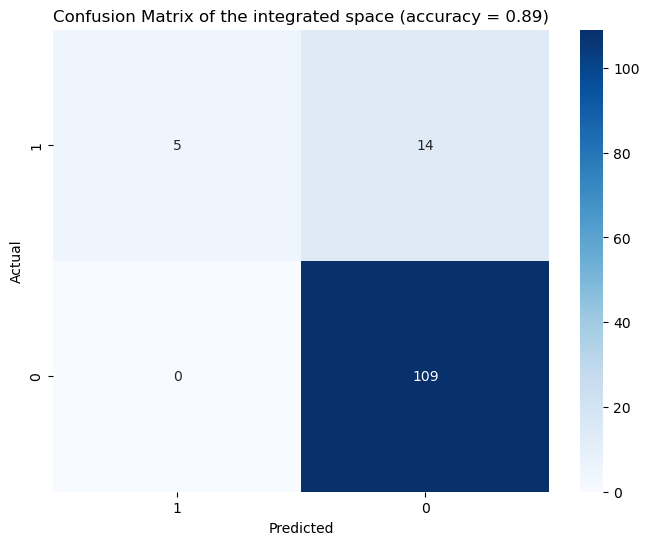

In [62]:
import pandas as pd
from sklearn.metrics import confusion_matrix

class_names = [1,0]
conf_matrix = confusion_matrix(y_test_conc,y_pred_conc, labels=class_names)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Add labels for the predicted and actual classes
conf_df.index.name = 'Actual'
conf_df.columns.name = 'Predicted'

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix of the integrated space (accuracy = {accuracy_inte:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()